# <center>Machine Learning Project</center>

** **
## <center>*01.02 - Preprocessing*</center>

** **

The members of the `team` are:
- Ana Farinha - 20211514
- Francisco Capontes - 20211692
- Sofia Gomes - 20240848
- Rui Lourenço - 2021639


## <span style="color:#568789"> Notebook  </span> 

In this notebook, ......

## <span style="color:#568789"> Table of Contents </span>

<a class="anchor" id="top"></a>

1. [Import Libraries](#one-bullet) <br>

2. [Import Datasets](#two-bullet) <br>

3. [Data Types](#three-bullet) <br>

4. [Incoherencies](#four-bullet) <br>

5. [Handling Missing Values](#five-bullet) <br>

6. [Removing Outliers](#six-bullet) <br>

7. [Feature Engineering](#seven-bullet) <br>
    7.1 [Creating New Features](#seven-one-bullet) <br>
    7.2 [Transforming Existing Features](#seven-two-bullet) <br>
    
8. [Visualizations](#eight-bullet) <br> 

9. [Variable Encoding](#nine-bullet) <br> 

10. [Export Datasets](#ten-bullet) <br> 


<a class="anchor" id="one-bullet"></a>

## <span style="color:#568789"> 1. Import Libraries</span>


The first step is to import the necessary libraries.

In [1]:
import pandas as pd
import os

# Missing Values
import missingno as msno

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Encoding
from sklearn.preprocessing import LabelEncoder

# Others
from utils import *

<a class="anchor" id="two-bullet"> 

## <span style="color:#568789"> 2. Import Datasets</span> 

<a href="#top">Top &#129033;</a>

Next, we start by importing the training dataset.

In [2]:
train_df = pd.read_csv('./eda_data/train_data.csv', index_col='Claim Identifier')
train_df

C:\Users\ruipb\AppData\Local\Temp\ipykernel_14100\1087301391.py:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('./eda_data/train_data.csv', index_col='Claim Identifier')


,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5393875,2019-12-30,31,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
5393091,2019-08-30,46,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,...,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
5393889,2019-12-06,40,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,...,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
5393887,2019-12-30,61,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,...,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0
5393863,2019-12-26,67,N,2020-01-01,N,0.00,1952.0,2019-12-31,NaN,INDEMNITY INS. OF N AMERICA,...,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,38.0,SHOULDER(S),11772,0.0,Not Work Related,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6165265,2022-12-14,35,N,2022-12-30,N,0.00,1987.0,2022-12-30,NaN,STATE INSURANCE FUND,...,45.0,COLLISION OR SIDESWIPE WITH ANOTHER VEHICLE,10.0,CONTUSION,42.0,LOWER BACK AREA,10467.0,0.0,Not Work Related,4.0
6165285,2022-12-15,33,N,2022-12-31,N,0.00,1989.0,2022-12-31,NaN,WESCO INSURANCE CO,...,74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON",37.0,INFLAMMATION,35.0,HAND,11590.0,0.0,Not Work Related,6.0
6165506,2022-12-13,61,N,2022-12-31,N,991.08,1961.0,2022-12-31,NaN,SECURITY NATIONAL INSURANCE CO,...,98.0,"CUMULATIVE, NOC",80.0,"ALL OTHER CUMULATIVE INJURY, NOC",34.0,WRIST,14227.0,0.0,Not Work Related,3.0


Following, we import the test dataset so that the simple transformations an imputations can be done in both datasets, while avoiding data leakage.

In [3]:
test_df = pd.read_csv('./eda_data/test_data.csv', index_col='Claim Identifier')
test_df

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
6165911,2022-12-24,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaN,INDEMNITY INSURANCE CO OF,...,IV,NaN,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,54.0,LOWER LEG,10466,1
6166141,2022-11-20,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaN,A I U INSURANCE COMPANY,...,IV,NaN,75.0,FALLING OR FLYING OBJECT,10.0,CONTUSION,10.0,MULTIPLE HEAD INJURY,11691,1
6165907,2022-12-26,59,N,2023-01-02,N,0.0,1963.0,2022-12-31,NaN,AMGUARD INSURANCE COMPANY,...,III,NaN,68.0,STATIONARY OBJECT,49.0,SPRAIN OR TEAR,62.0,BUTTOCKS,10604,0
6166047,2022-12-28,55,N,2023-01-02,N,0.0,0.0,2023-01-02,NaN,INDEMNITY INS. OF N AMERICA,...,IV,NaN,25.0,FROM DIFFERENT LEVEL (ELEVATION),10.0,CONTUSION,53.0,KNEE,11411,6
6166102,2022-12-20,25,N,2023-01-02,N,0.0,1997.0,2022-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,IV,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,40.0,LACERATION,37.0,THUMB,11212,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6553137,2012-09-12,52,N,2024-06-05,N,NaN,1960.0,2012-10-23,NaN,STATE INSURANCE FUND,...,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13619,5
6553119,2024-05-22,59,N,2024-06-05,Y,0.0,1965.0,NaN,2024-05-28,NYC TRANSIT AUTHORITY,...,IV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11776,1
6553542,2024-05-06,45,N,2024-06-05,Y,0.0,1979.0,NaN,NaN,STATE INSURANCE FUND,...,IV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11368,5


<a class="anchor" id="three-bullet"> 

## <span style="color:#568789"> 3. Data Types</span> 

<a href="#top">Top &#129033;</a>

As all necessary analysis and explanations were given in the previous notebook, this notebook will only have the necessary changes on the data types.

In [4]:
datatype_changes([train_df, test_df])

<a class="anchor" id="four-bullet"> 

## <span style="color:#568789"> 4. Incoherencies</span> 

<a href="#top">Top &#129033;</a>

1. `Age at Injury` with non-valid values

According to NY laws, the minimum age to work is 14 years old with some restrictions. Any restrictions are lifted after 18 years old. Additionally, we also defined an upper limit of 119 because the oldest person alive between 2020 and 2022 was 119 years old.


In [5]:
limit_feature([train_df, test_df], 'Age at Injury', minimum=14, maximum=119)

DataFrame 1:
Number of rows with 0: 5462.
Number of rows below 14: 5509.
Number of rows above 119: 0.

DataFrame 2:
Number of rows with 0: 3248.
Number of rows below 14: 3283.
Number of rows above 119: 0.



2. `Birth Year` with non-valid values

Here, we take the previous limits into account to calculate limits to this variable.

In [6]:
limit_feature([train_df, test_df], 'Birth Year', minimum=2024-119+1, maximum=2024-14+1)

DataFrame 1:
Number of rows with 0: 25081.
Number of rows below 1906: 25176.
Number of rows above 2011: 7.

DataFrame 2:
Number of rows with 0: 19596.
Number of rows below 1906: 19757.
Number of rows above 2011: 10.



3. A person's age shoud be greather than `Age at Injury`

In [7]:
# Calculate the age at accident (from the birth year and accident date)
train_df['Calculated_Age_at_Accident'] = train_df['Accident Date'].dt.year - train_df['Birth Year']

# Check for incoherencies when the values are not missing
train_df[(train_df['Age at Injury'].notna()) & 
                 (train_df['Calculated_Age_at_Accident'].notna()) &
                 (train_df['Age at Injury'] != train_df['Calculated_Age_at_Accident']) &
                 (abs(train_df['Age at Injury'] - train_df['Calculated_Age_at_Accident']) > 1)]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents,Calculated_Age_at_Accident
Claim Identifier,,,,,,,,,,,,,,,,,,,,,


This never happens in our dataset.

In [8]:
# Drop created column
train_df = train_df.drop('Calculated_Age_at_Accident', axis=1)

4. `Average Weekly Wage` should not be equal to 0

In [9]:
limit_feature([train_df, test_df], 'Average Weekly Wage', minimum=1, maximum=None)

DataFrame 1:
Number of rows with 0: 335448.
Number of rows below 1: 335448.

DataFrame 2:
Number of rows with 0: 316549.
Number of rows below 1: 316549.



5. Compare the variables `Industry Code` and `Industry Code Description`

In [10]:
# Count the number of unique descriptions for each Industry Code
industry_description_counts = train_df.groupby('Industry Code')['Industry Code Description'].nunique()

# Check if any Industry Code has more than 1 unique description
inconsistent_industry_codes = industry_description_counts[industry_description_counts > 1]

if len(inconsistent_industry_codes) > 0:
    print(f"These Industry Codes have inconsistent descriptions: {inconsistent_industry_codes}")
else:
    print("All Industry Codes have the same description across the dataset.")


All Industry Codes have the same description across the dataset.


<a class="anchor" id="five-bullet"> 

## <span style="color:#568789"> 5. Handling Missing Values</span> 

<a href="#top">Top &#129033;</a>

Before starting, let's check the columns that can be dropped or inputed.

In [11]:
# Display the percentage of missing values per column

missing_values = train_df.isnull().sum() / len(train_df) * 100

missing_values[missing_values > 0].sort_values(ascending=False)

OIICS Nature of Injury Description    100.000000
IME-4 Count                            76.864556
First Hearing Date                     73.730018
C-3 Date                               67.380632
Average Weekly Wage                    63.429229
Birth Year                              9.452741
WCIO Part Of Body Description           2.975485
WCIO Nature of Injury Description       2.727238
WCIO Cause of Injury Description        2.724276
C-2 Date                                2.536131
Age at Injury                           0.959716
Accident Date                           0.642308
dtype: float64

In [12]:
# Display the percentage of missing values per column

missing_values = test_df.isnull().sum() / len(test_df) * 100

missing_values[missing_values > 0].sort_values(ascending=False)

OIICS Nature of Injury Description    100.000000
IME-4 Count                            90.914621
First Hearing Date                     88.909595
Average Weekly Wage                    86.539854
C-3 Date                               78.035698
Birth Year                             10.113280
WCIO Nature of Injury Description       2.721825
WCIO Cause of Injury Description        2.667182
WCIO Part Of Body Description           2.461241
C-2 Date                                2.354275
Age at Injury                           0.846189
Accident Date                           0.629937
dtype: float64

We decided to drop `OIICS Nature of Injury Description` because it only has missing values.

In [13]:
train_df = train_df.drop('OIICS Nature of Injury Description', axis = 1)
test_df = test_df.drop('OIICS Nature of Injury Description', axis = 1)

*Input `Accident Date`*

The second variable that we decided to tackle is `Accident Date`. While exploring the dataset, we noticed that in some cases that date is the same as `Assembly Date`. As such, we decided to replace the missing values with the other date.

In [14]:
train_df[train_df['Accident Date'] == train_df['Assembly Date']]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5393820,2020-01-02,57,N,2020-01-02,Y,2175.45,1963,2020-06-05,2019-12-26,INDEMNITY INSURANCE CO OF,...,97.0,REPETITIVE MOTION,78.0,CARPAL TUNNEL SYNDROME,39.0,WRIST (S) & HAND(S),13476,0.0,Not Work Related,1.0
5394146,2020-01-02,76,N,2020-01-02,Y,549.26,<NA>,2020-02-11,2019-12-26,BOARD OF EDUCATION CNY,...,98.0,"CUMULATIVE, NOC",59.0,"ALL OTHER SPECIFIC INJURIES, NOC",31.0,UPPER ARM,75056,0.0,Not Work Related,2.0
5394780,2020-01-02,65,N,2020-01-02,N,NaN,1954,2020-01-02,NaT,STATE INSURANCE FUND,...,98.0,"CUMULATIVE, NOC",52.0,STRAIN OR TEAR,38.0,SHOULDER(S),14042,0.0,Not Work Related,5.0
5394376,2020-01-02,37,N,2020-01-02,N,1124.57,1982,2020-01-02,NaT,CHARTER OAK FIRE INS CO,...,18.0,"POWERED HAND TOOL, APPLIANCE",40.0,LACERATION,36.0,FINGER(S),11714,0.0,Not Work Related,1.0
5395577,2020-01-03,58,N,2020-01-03,N,1428.33,1961,2020-01-03,NaT,STATE INSURANCE FUND,...,17.0,OBJECT BEING LIFTED OR HANDLED,40.0,LACERATION,19.0,FACIAL BONES,11901,0.0,Not Work Related,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6164198,2022-12-29,25,N,2022-12-29,N,NaN,1997,2022-12-29,NaT,STATE INSURANCE FUND,...,97.0,REPETITIVE MOTION,52.0,STRAIN OR TEAR,42.0,LOWER BACK AREA,11726,0.0,Not Work Related,3.0
6164657,2022-12-29,27,N,2022-12-29,N,1163.54,1995,2022-12-29,NaT,STATE INSURANCE FUND,...,32.0,ON ICE OR SNOW,10.0,CONTUSION,42.0,LOWER BACK AREA,11356,0.0,Not Work Related,6.0
6163731,2022-12-29,47,N,2022-12-29,N,NaN,1975,2022-12-29,NaT,"WEGMANS FOOD MARKETS, INC.",...,32.0,ON ICE OR SNOW,52.0,STRAIN OR TEAR,42.0,LOWER BACK AREA,14215,0.0,Not Work Related,6.0


In [15]:
# Filter the rows where 'Accident Date' is NaN, but 'Assembly Date' is not NaN
condition = train_df['Accident Date'].isna() & train_df['Assembly Date'].notna()

# Replace missing 'Accident Date' with 'Assembly Date' where the condition is true
train_df.loc[condition, 'Accident Date'] = train_df.loc[condition, 'Assembly Date']

In [16]:
# Filter the rows where 'Accident Date' is NaN, but 'Assembly Date' is not NaN in the test dataset
condition = test_df['Accident Date'].isna() & test_df['Assembly Date'].notna()

# Replace missing 'Accident Date' with 'Assembly Date' where the condition is true in the test dataset
test_df.loc[condition, 'Accident Date'] = test_df.loc[condition, 'Assembly Date']

*Calculate `Age at Injury`*

Afte, we can easily input are related to age/birth year. By using the relationship between `Age at Injury`, `Accident Date` and `Birth Year`, we can easily calculate some missing values.

In [17]:
# Filter the rows where 'Age at Injury' is NaN, but 'Birth Year' and 'Accident Date' are not NaN
condition = train_df['Age at Injury'].isna() & train_df['Birth Year'].notna() & train_df['Accident Date'].notna()

# Replace missing 'Age at Injury' with the difference between 'Accident Date' and 'Birth Year'
train_df.loc[condition, 'Age at Injury'] = train_df.loc[condition, 'Accident Date'].dt.year - train_df.loc[condition, 'Birth Year']


# Filter the rows where 'Age at Injury' is NaN, but 'Birth Year' and 'Accident Date' are not NaN in the test dataset
condition = test_df['Age at Injury'].isna() & test_df['Birth Year'].notna() & test_df['Accident Date'].notna()

# Replace missing 'Age at Injury' with the difference between 'Accident Date' and 'Birth Year' where the condition is true
test_df.loc[condition, 'Age at Injury'] = test_df.loc[condition, 'Accident Date'].dt.year - test_df.loc[condition, 'Birth Year']

*Calculate `Birth Year`*

In [18]:
# Filter the rows where 'Birth Year' is NaN, but 'Age at Injury' and 'Accident Date' are not NaN
condition = train_df['Birth Year'].isna() & train_df['Age at Injury'].notna() & train_df['Accident Date'].notna()

# Replace missing 'Birth Year' with the difference between 'Accident Date' year and 'Age at Injury'
train_df.loc[condition, 'Birth Year'] = train_df.loc[condition, 'Accident Date'].dt.year - train_df.loc[condition, 'Age at Injury']


# Filter the rows where 'Birth Year' is NaN, but 'Age at Injury' and 'Accident Date' are not NaN in the test dataset
condition = test_df['Birth Year'].isna() & test_df['Age at Injury'].notna() & test_df['Accident Date'].notna()

# Replace missing 'Birth Year' with the difference between 'Accident Date' year and 'Age at Injury' where the condition is true
test_df.loc[condition, 'Birth Year'] = test_df.loc[condition, 'Accident Date'].dt.year - test_df.loc[condition, 'Age at Injury']

*Input `IME-4 Count`*

The next colum is `IME-4 Count` which also has a high number of missing values. In this case, we started to explore the values that the variable already had.

In [19]:
train_df['IME-4 Count'].unique()

array([nan,  4.,  1.,  3.,  2.,  6.,  7.,  5., 10., 12.,  8.,  9., 11.,
       13., 14., 36., 15., 20., 19., 18., 27., 17., 16., 24., 22., 26.,
       21., 23., 30., 32., 39., 25., 29., 47., 48., 34., 28., 37., 31.,
       35., 33., 73.])

As this variables represents the number of IME-4 forms received per claim and its never 0, we reached the conclusion that the missing values represent that no IME-4 form was received. As such, we decided to replace the missing values with 0.

In [20]:
train_df['IME-4 Count'] = train_df['IME-4 Count'].fillna(0)
test_df['IME-4 Count'] = test_df['IME-4 Count'].fillna(0)

*Some Conclusions*

As for the other columns like `WCIO Part Of Body Description`, `WCIO Nature of Injury Description` and `WCIO Cause of Injury Description`, they are only essential to interpret the codes in the other columns so we decided not to do anything.

To conclude this section, we decided to see how many missing values we still have.

In [21]:
# Display the percentage of missing values per column

missing_values = train_df.isnull().sum() / len(train_df) * 100

missing_values[missing_values > 0].sort_values(ascending=False)

First Hearing Date                   73.730018
C-3 Date                             67.380632
Average Weekly Wage                  63.429229
WCIO Part Of Body Description         2.975485
WCIO Nature of Injury Description     2.727238
WCIO Cause of Injury Description      2.724276
C-2 Date                              2.536131
Age at Injury                         0.401377
Birth Year                            0.401377
dtype: float64

In [22]:
# Display the percentage of missing values per column

missing_values = test_df.isnull().sum() / len(test_df) * 100

missing_values[missing_values > 0].sort_values(ascending=False)

First Hearing Date                   88.909595
Average Weekly Wage                  86.539854
C-3 Date                             78.035698
WCIO Nature of Injury Description     2.721825
WCIO Cause of Injury Description      2.667182
WCIO Part Of Body Description         2.461241
C-2 Date                              2.354275
Age at Injury                         0.300277
Birth Year                            0.300277
dtype: float64

The variables `Age at Injury`, `Birth Year` and `Average Weekly Wage` will be imputed using the median. However, due to the high amount of missing values in the last one, there is a high chance that it will not be used. As for the other two, only one will be imputed because the other can be calculated after having the other one. It is worth to mention that this imputation can only happen after we split our data to avoid data leakage. 

In the variable `First Hearing Date`, a blank space means the the claim has not yet had a hearing held. Additionally, missing values in `C2-Date` and `C3-Date` mean that the event is yet to happen. To distinguish this NAs from true missing values, we decided to replace them with -1. THis will be done in the section of feature engineering.

<a class="anchor" id="six-bullet"> 

## <span style="color:#568789"> 6. Removing Outliers</span> 

<a href="#top">Top &#129033;</a>

We use the method Z-score to identify the outliers based on the number of standard deviations from the mean. The threshold that we use is 3. That means that any data point with a Z-score beyond this range is considered an outlier.

In [23]:
#numerical_df = numerical_df[(np.abs(stats.zscore(numerical_df)) < 3).all(axis=1)]

# <span style="color:yellow">Not done</span>

Nas incoerencias, o limite de idade está em 119

DEVIAMOS OLHAR PARA ISTO POR CAUSA DO FEEDBACK GERAL


<a class="anchor" id="seven-bullet"> 

## <span style="color:#568789"> 7. Feature Engineering</span> 

<a href="#top">Top &#129033;</a>

#### <span style="color:#568789"> 7.1 Creating New Features </span> 

*Date Features*

Dates can hold a lot of valuable information. We can extract components like year, month, and day of the week, which may capture seasonality or trends.<br><br>
For the date columns:<br>
__1. Year, Month, Day:__ These could provide insights on seasonality.<br>
__2. Day of Week:__ Useful for identifying patterns on specific days.<br>
__3. Time Differences:__ Calculating time spans between dates can be useful for tracking progress or delays in cases.

Due to the high amount of missing values in these columns (sometimes because the event did not happen yet), we decided to create some variables that inform us if the date exists or not.

In [24]:
date_columns = ['Accident Date', 'Assembly Date', 'C-2 Date', 'C-3 Date', 'First Hearing Date', 'Age at Injury', 'Birth Year']

for col in date_columns:
    train_df[f"Known {col}"] = train_df[col].notna().astype(int)
    test_df[f"Known {col}"] = test_df[col].notna().astype(int)

In [25]:
# Create columns for year, month, day, and day of the week
date_columns = ['Accident Date', 'Assembly Date', 'C-2 Date', 'C-3 Date', 'First Hearing Date']
extract_dates_components([train_df, test_df], date_columns)

*Calculate Time Differences*

Create new columns to capture the elapsed time between key dates, which can help understand delays or the timeline of events.

In [26]:
dist_dates([train_df, test_df])

*Seasonality of Accident Date*

Create column that indicates the season in which the accident happened.

In [27]:
# Apply the function to the 'Accident Date' column
train_df['Accident_Season'] = train_df['Accident Date'].apply(get_season)
test_df['Accident_Season'] = test_df['Accident Date'].apply(get_season)

*Accident Timing Indicator (Weekend or Holiday)*

Create columns that indicate if the accident happened on a weekend or a holiday.

In [28]:
# Flag public holidays
train_df = flag_public_holiday_accidents(train_df, 'Accident Date')
test_df = flag_public_holiday_accidents(test_df, 'Accident Date')

In [29]:
# Flag weekends
train_df = flag_weekend_accidents(train_df, 'Accident Date')
test_df = flag_weekend_accidents(test_df, 'Accident Date')

*Risk Level*

Create a column that indicates how dangerous the industry of the worker is.

In [30]:
Risk_map = {
    "HEALTH CARE AND SOCIAL ASSISTANCE": 1,  # Medium risk
    "PUBLIC ADMINISTRATION": 0,             # Low risk
    "RETAIL TRADE": 1,                      # Medium risk
    "TRANSPORTATION AND WAREHOUSING": 2,    # High risk
    "EDUCATIONAL SERVICES": 0,              # Low risk
    "MANUFACTURING": 2,                     # High risk
    "CONSTRUCTION": 2,                      # High risk
    "ACCOMMODATION AND FOOD SERVICES": 1,   # Medium risk
    "ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMENT AND REMEDIAT": 1, # Medium risk
    "WHOLESALE TRADE": 1,                   # Medium risk
    "OTHER SERVICES (EXCEPT PUBLIC ADMINISTRATION)": 0, # Low risk
    "ARTS, ENTERTAINMENT, AND RECREATION": 1,           # Medium risk
    "PROFESSIONAL, SCIENTIFIC, AND TECHNICAL SERVICES": 0, # Low risk
    "INFORMATION": 0,                        # Low risk
    "REAL ESTATE AND RENTAL AND LEASING": 0, # Low risk
    "FINANCE AND INSURANCE": 0,              # Low risk
    "UTILITIES": 2,                          # High risk
    "AGRICULTURE, FORESTRY, FISHING AND HUNTING": 2, # High risk
    "MINING": 2,                             # High risk
    "MANAGEMENT OF COMPANIES AND ENTERPRISES": 0, # Low risk
    "nan": 1 # Medium Risk
}

In [31]:
train_df["Risk_Level"] = train_df["Industry Code Description"].map(Risk_map)
test_df["Risk_Level"] = test_df["Industry Code Description"].map(Risk_map)

#### <span style="color:#568789"> 7.2 Transforming Existing Features </span> 

*Modifying `Carrier Type`*

In the `Carrier Type` column, there are three values that are similar which represent different types of special funds. Only 9 special funds could be identified, leaving 1023 unkown. As such, we decided to join all of them in the unkown special funds.

In [32]:
train_df['Carrier Type'] = train_df['Carrier Type'].replace({'5C. SPECIAL FUND - POI CARRIER WCB MENANDS': '5D. SPECIAL FUND - UNKNOWN'})
train_df['Carrier Type'] = train_df['Carrier Type'].replace({'5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)': '5D. SPECIAL FUND - UNKNOWN'})

test_df['Carrier Type'] = test_df['Carrier Type'].replace({'5C. SPECIAL FUND - POI CARRIER WCB MENANDS': '5D. SPECIAL FUND - UNKNOWN'})
test_df['Carrier Type'] = test_df['Carrier Type'].replace({'5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)': '5D. SPECIAL FUND - UNKNOWN'})

*Modifying `Gender`*

In the `Gender` column, we replaced the values `U` and `X` with `Unknown`. The value `U` typically indicates "unknown" or unspecified gender, while `X` may signify a non-binary identity. By combining these two values into `Unknown`, we simplify the data, making it easier to analyze and interpret.

In [33]:
# Replace 'U' with 'Unknown'
train_df['Gender'] = train_df['Gender'].replace({'U': 'Unknown'})
# Replace 'X' with 'Unknown'
train_df['Gender'] = train_df['Gender'].replace({'X': 'Unknown'})

# Replace 'U' with 'Unknown'
test_df['Gender'] = test_df['Gender'].replace({'U': 'Unknown'})
# Replace 'X' with 'Unknown'
test_df['Gender'] = test_df['Gender'].replace({'X': 'Unknown'})

<a class="anchor" id="eight-bullet"> 

## <span style="color:#568789"> 8. Visualizations</span> 

<a href="#top">Top &#129033;</a>

After all the modifications that we did, let's check how our variables changed.

Let's start with the distribution of the numerical features.

In [34]:
numerical_features = [
    'Age at Injury', 'Average Weekly Wage', 'Birth Year', 'IME-4 Count', 'Number of Dependents'
]
numerical_df = train_df[numerical_features]

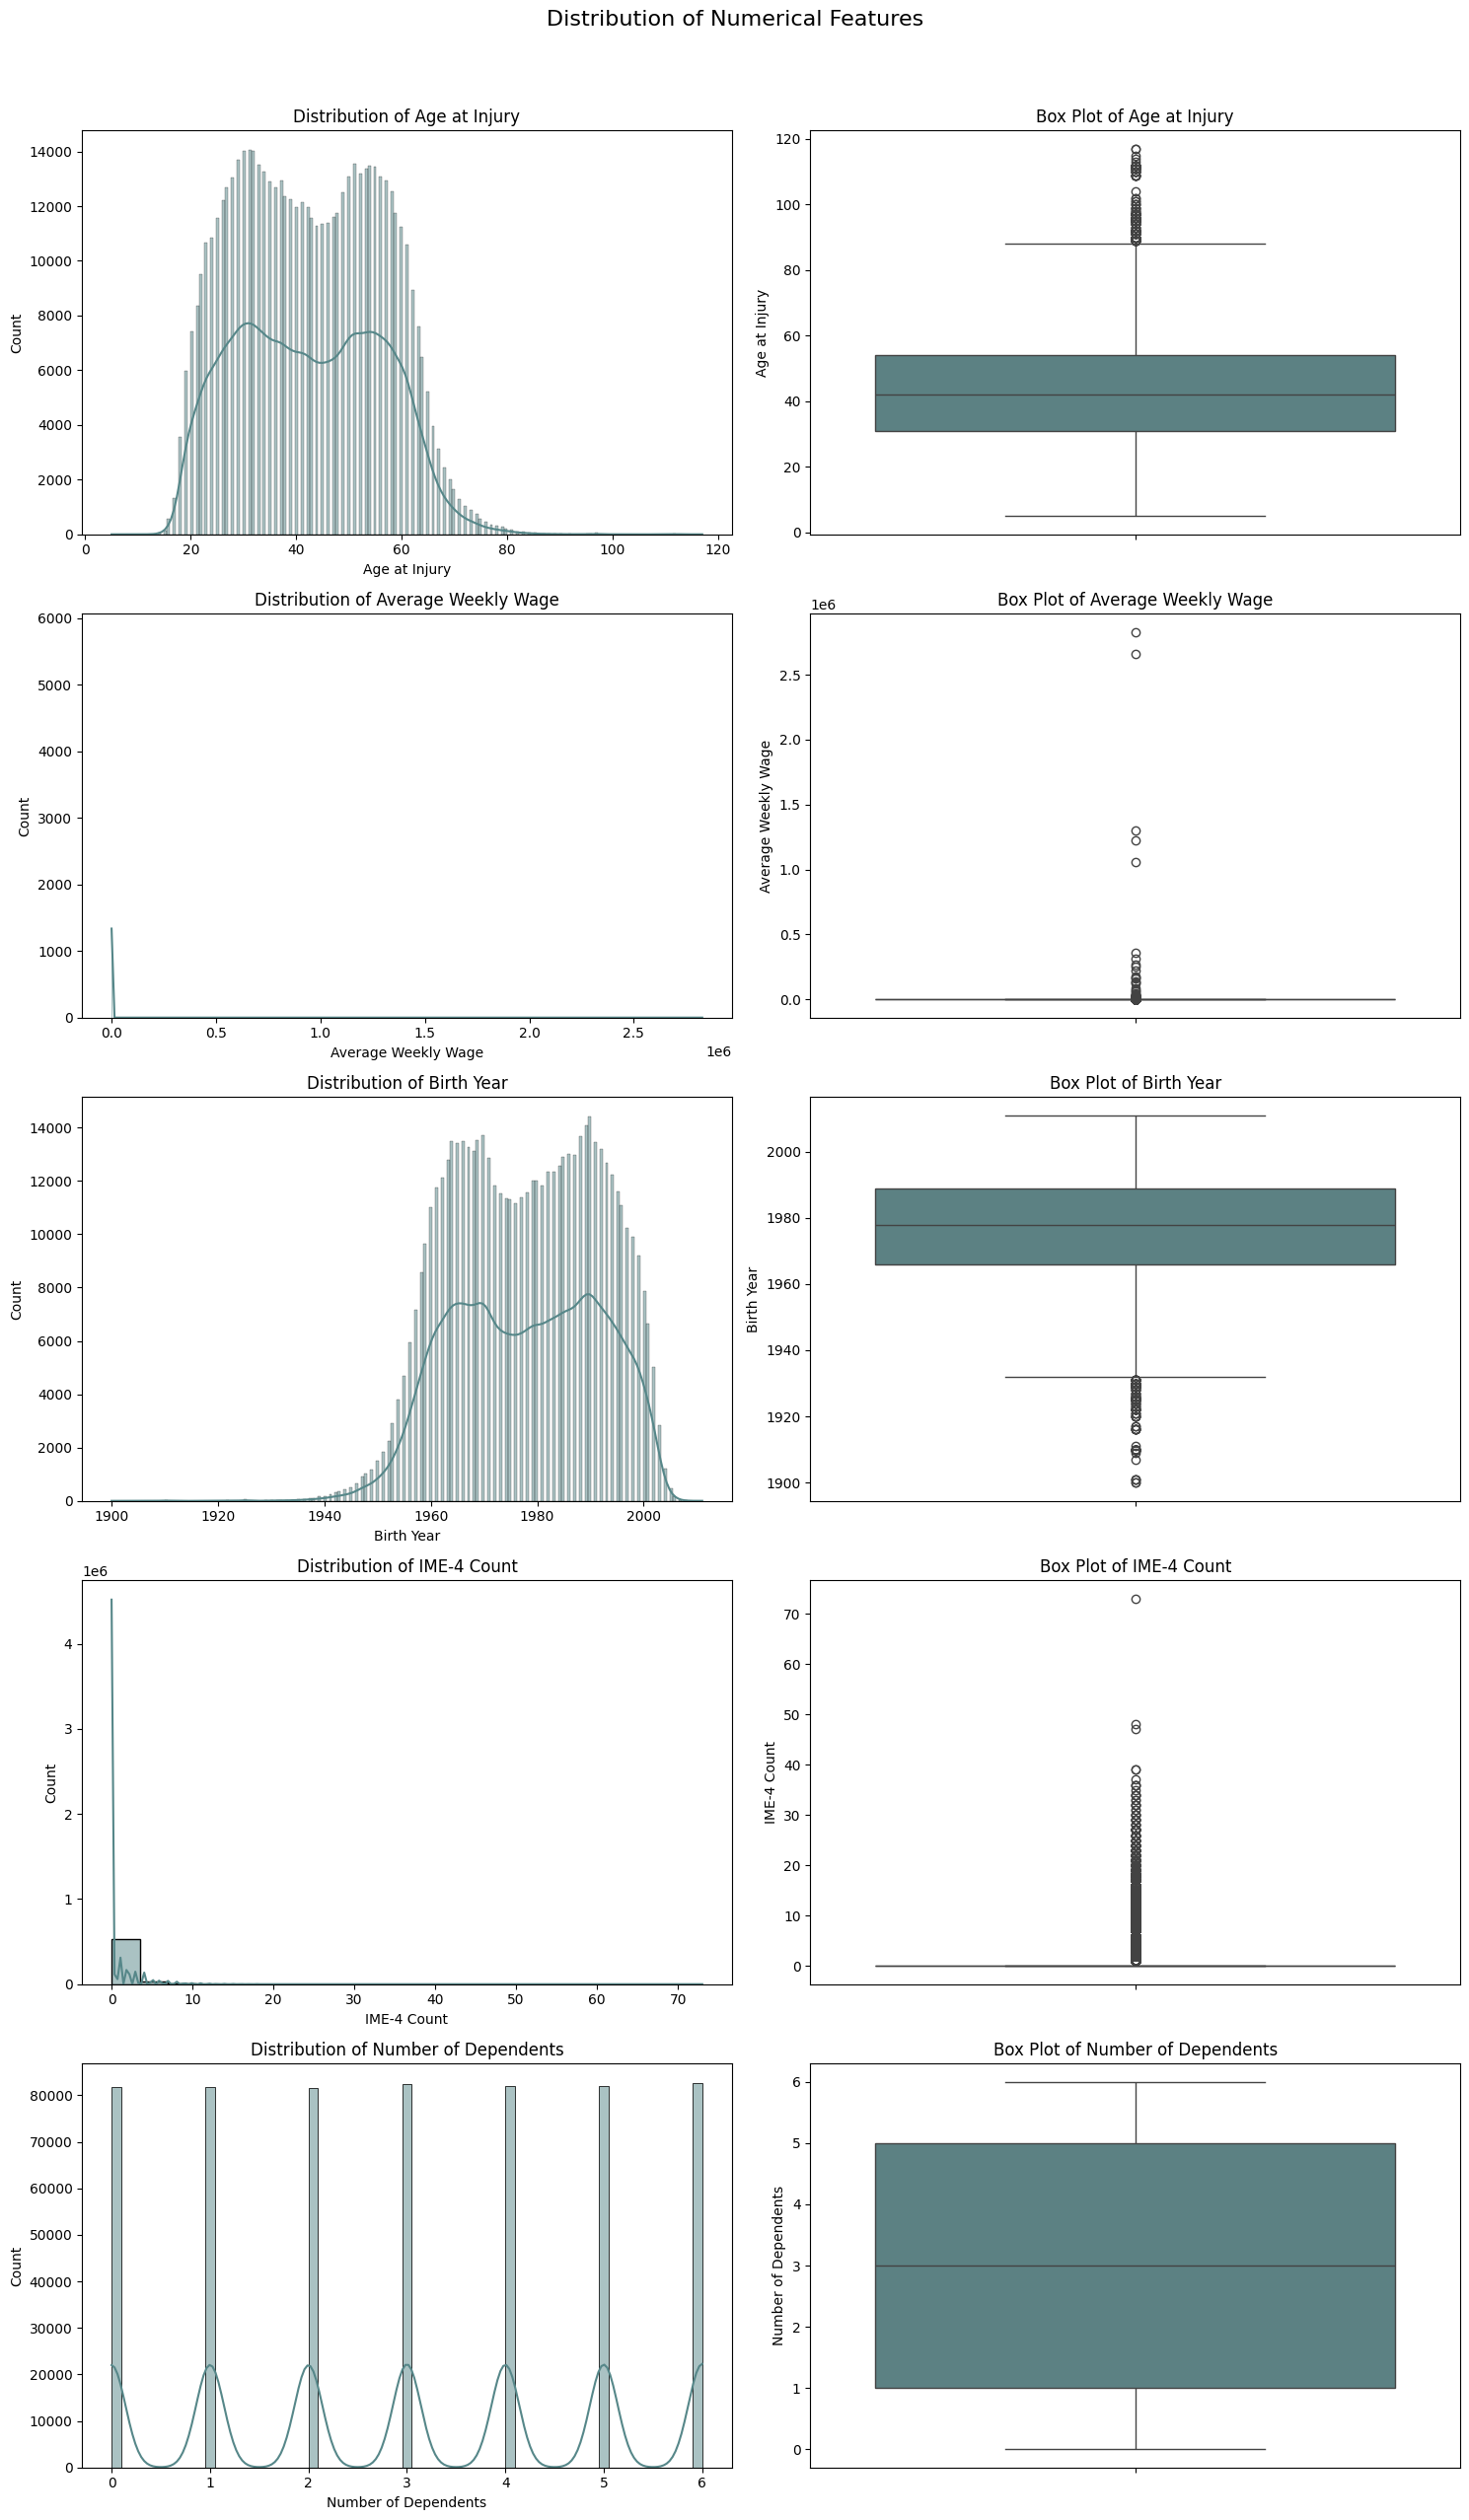

In [35]:
fig, axes = plt.subplots(len(numerical_features), 2, figsize=(15, 5*len(numerical_features)))
fig.suptitle('Distribution of Numerical Features', fontsize=16, y=1.02)

for idx, feature in enumerate(numerical_features):
    # Histogram with KDE
    sns.histplot(data=numerical_df, x=feature, kde=True, ax=axes[idx, 0], color=plot_color)
    axes[idx, 0].set_title(f'Distribution of {feature}')
    axes[idx, 0].set_xlabel(feature)
        
    # Box plot - Use the color parameter instead of palette
    sns.boxplot(data=numerical_df, y=feature, ax=axes[idx, 1], color=plot_color)
    axes[idx, 1].set_title(f'Box Plot of {feature}')
    
plt.tight_layout()
plt.show()

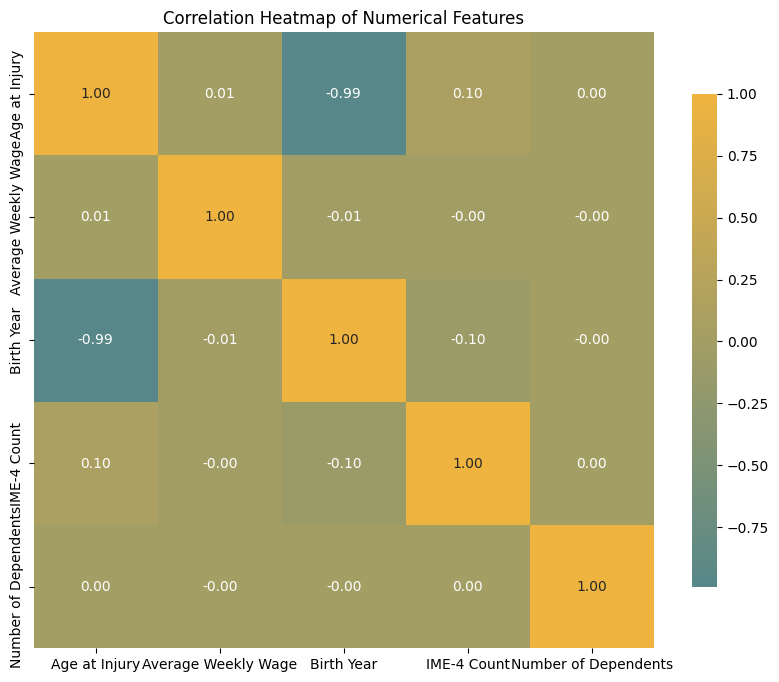

In [36]:
# Plot the heatmap with the custom gradient colormap
plt.figure(figsize=(10, 8))
correlation_matrix = numerical_df.corr()

sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap=custom_cmap,  # Apply the custom gradient colormap
            center=0,
            fmt='.2f',
            cbar_kws={"shrink": .8})  # Adjust color bar size if needed

plt.title('Correlation Heatmap of Numerical Features')
plt.show()


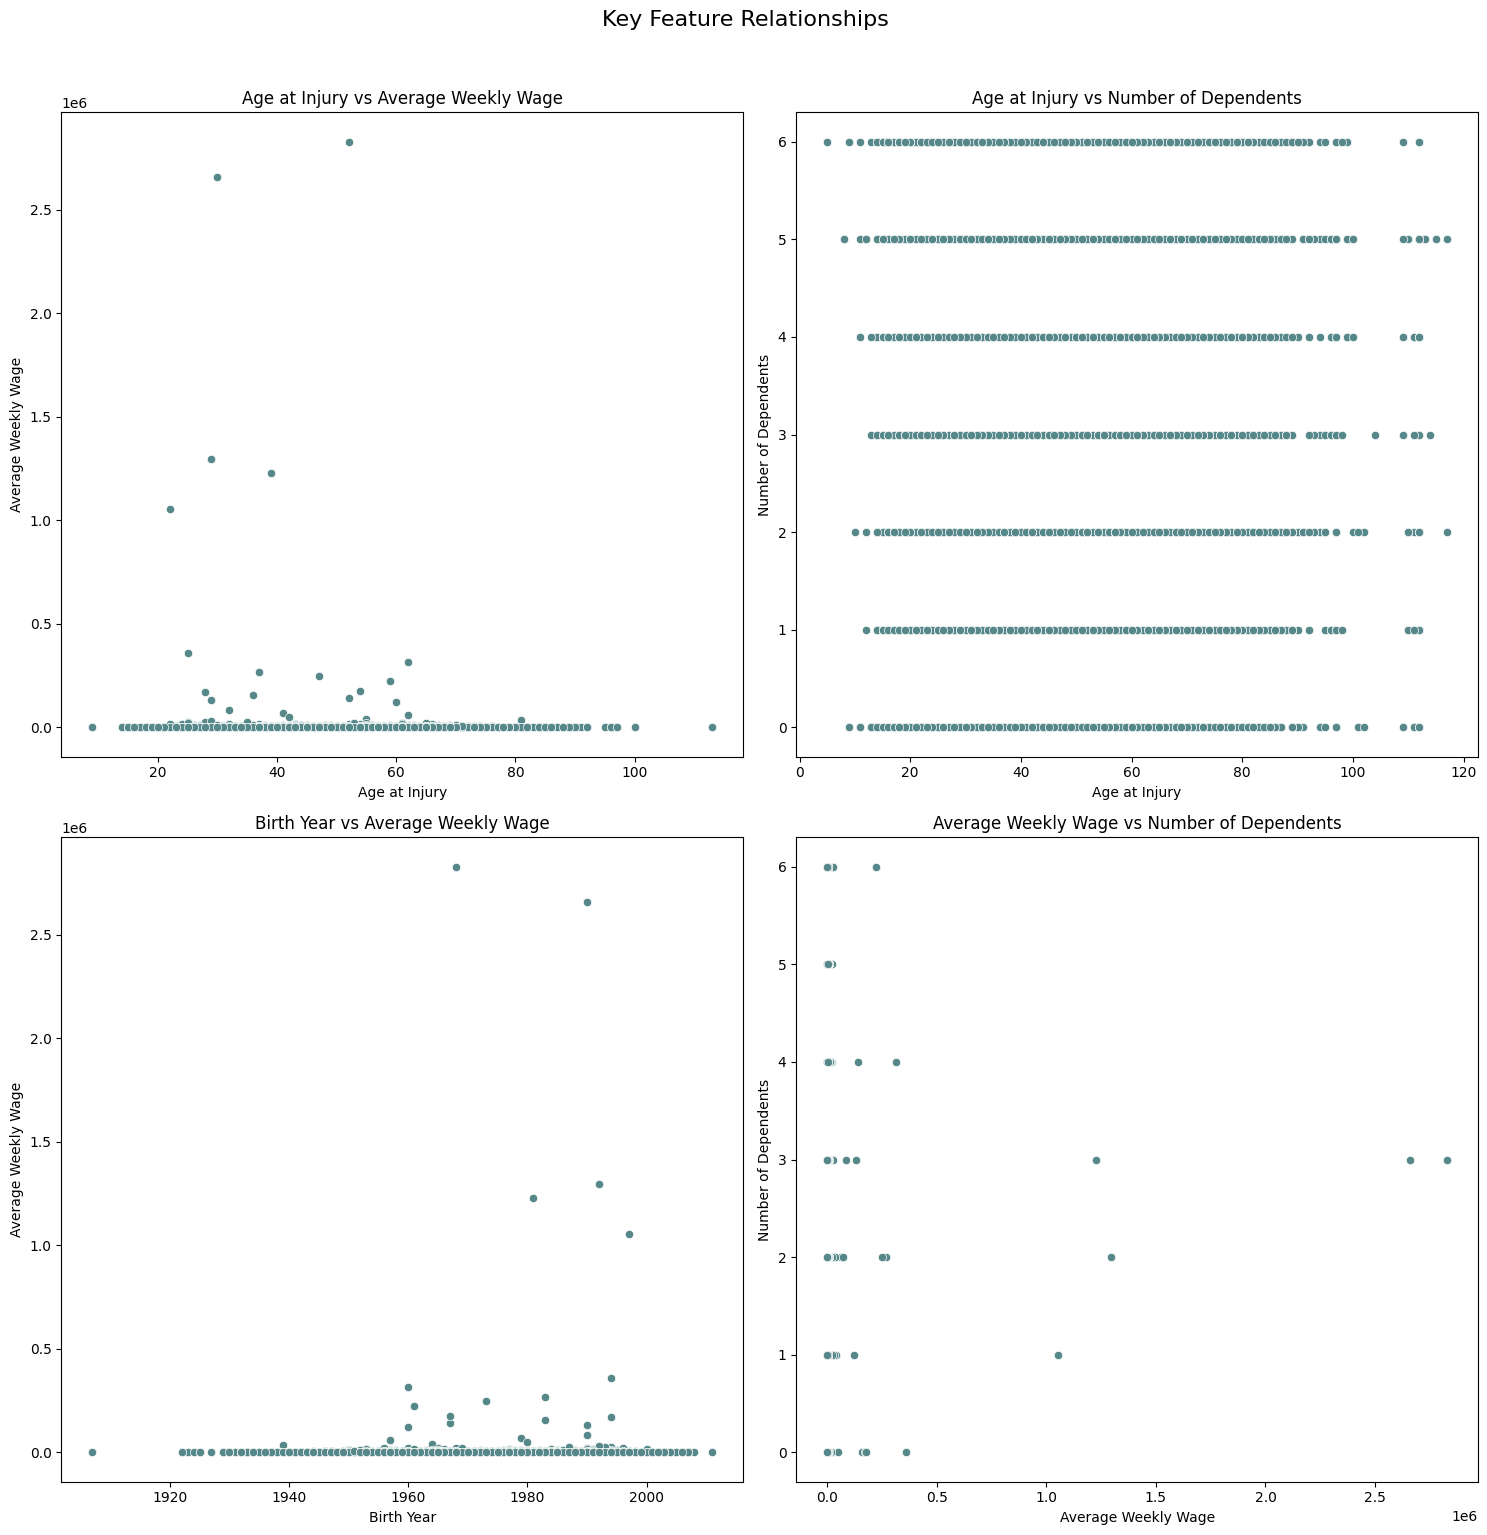

In [37]:
# Setting up the figure
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle('Key Feature Relationships', fontsize=16, y=1.02)

# Age at Injury vs Average Weekly Wage
sns.scatterplot(data=numerical_df, 
                x='Age at Injury', 
                y='Average Weekly Wage',
                ax=axes[0, 0],
                color=plot_color)
axes[0, 0].set_title('Age at Injury vs Average Weekly Wage')

# Age at Injury vs Number of Dependents
sns.scatterplot(data=numerical_df, 
                x='Age at Injury', 
                y='Number of Dependents',
                ax=axes[0, 1],
                color=plot_color)
axes[0, 1].set_title('Age at Injury vs Number of Dependents')

# Birth Year vs Average Weekly Wage
sns.scatterplot(data=numerical_df, 
                x='Birth Year', 
                y='Average Weekly Wage',
                ax=axes[1, 0],
                color=plot_color)
axes[1, 0].set_title('Birth Year vs Average Weekly Wage')

# Average Weekly Wage vs Number of Dependents
sns.scatterplot(data=numerical_df, 
                x='Average Weekly Wage', 
                y='Number of Dependents',
                ax=axes[1, 1],
                color=plot_color)
axes[1, 1].set_title('Average Weekly Wage vs Number of Dependents')
    
plt.tight_layout()
plt.show()


In [38]:
categorical_features = [
    'Alternative Dispute Resolution', 'Attorney/Representative',
    'Carrier Name',  'Carrier Type', 'County of Injury',
    'COVID-19 Indicator',  'District Name', 'Gender', 'Industry Code',
    'Industry Code Description',  'Medical Fee Region',  'WCIO Cause of Injury Code',
    'WCIO Cause of Injury Description',  'WCIO Nature of Injury Code',
    'WCIO Nature of Injury Description',  'WCIO Part Of Body Code',
    'WCIO Part Of Body Description',  'Zip Code', 'Agreement Reached',
    'WCB Decision', 'Claim Injury Type'
]

categorical_df = train_df[categorical_features]
categorical_df

,Alternative Dispute Resolution,Attorney/Representative,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,Gender,Industry Code,Industry Code Description,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Claim Injury Type
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5393875,N,N,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,ST. LAWRENCE,N,SYRACUSE,M,44.0,RETAIL TRADE,...,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,2. NON-COMP
5393091,N,Y,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,WYOMING,N,ROCHESTER,F,23.0,CONSTRUCTION,...,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4. TEMPORARY
5393889,N,N,INDEMNITY INSURANCE CO OF,1A. PRIVATE,ORANGE,N,ALBANY,M,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,...,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,4. TEMPORARY
5393887,N,N,STATE INSURANCE FUND,2A. SIF,DUTCHESS,N,ALBANY,M,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,...,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,2. NON-COMP
5393863,N,N,INDEMNITY INS. OF N AMERICA,1A. PRIVATE,SUFFOLK,N,HAUPPAUGE,M,44.0,RETAIL TRADE,...,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,38.0,SHOULDER(S),11772,0.0,Not Work Related,3. MED ONLY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6165265,N,N,STATE INSURANCE FUND,2A. SIF,BRONX,N,NYC,M,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,...,45.0,COLLISION OR SIDESWIPE WITH ANOTHER VEHICLE,10.0,CONTUSION,42.0,LOWER BACK AREA,10467.0,0.0,Not Work Related,2. NON-COMP
6165285,N,N,WESCO INSURANCE CO,1A. PRIVATE,NASSAU,N,NYC,M,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,...,74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON",37.0,INFLAMMATION,35.0,HAND,11590.0,0.0,Not Work Related,2. NON-COMP
6165506,N,N,SECURITY NATIONAL INSURANCE CO,1A. PRIVATE,ERIE,N,BUFFALO,F,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,...,98.0,"CUMULATIVE, NOC",80.0,"ALL OTHER CUMULATIVE INJURY, NOC",34.0,WRIST,14227.0,0.0,Not Work Related,4. TEMPORARY


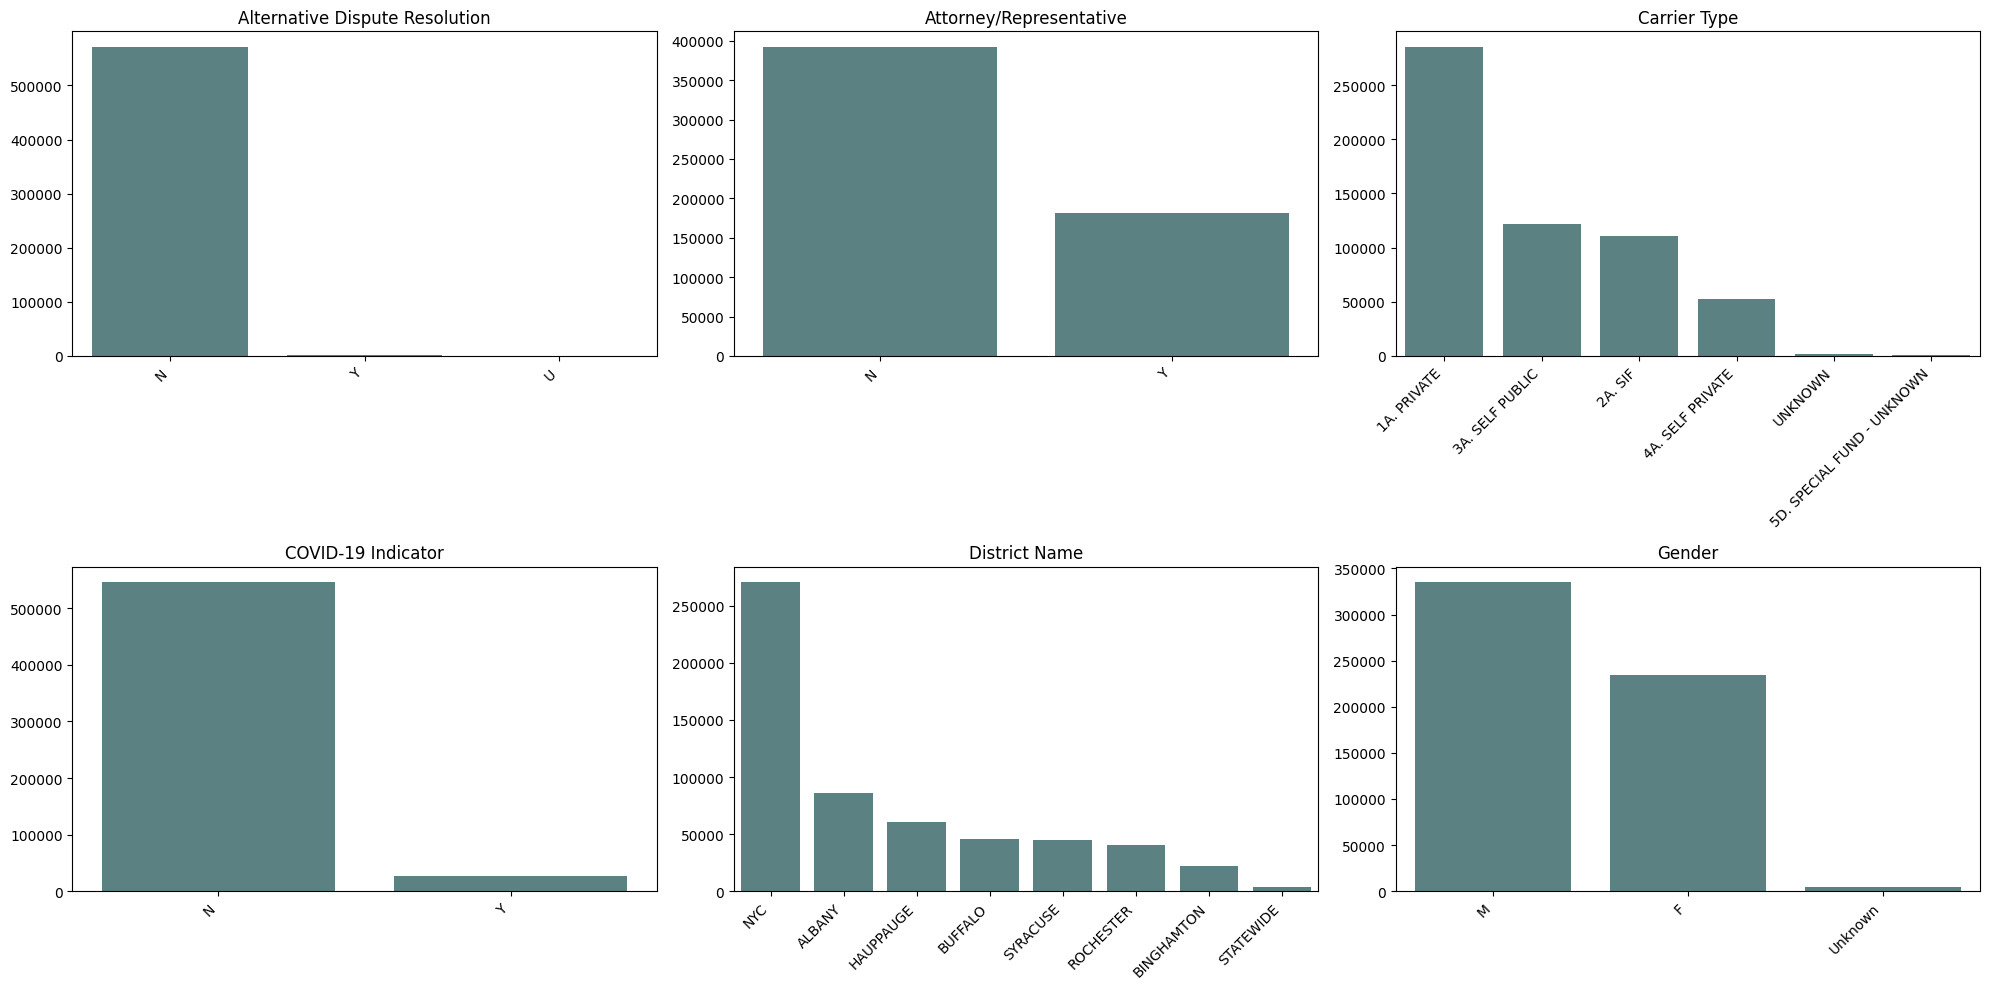

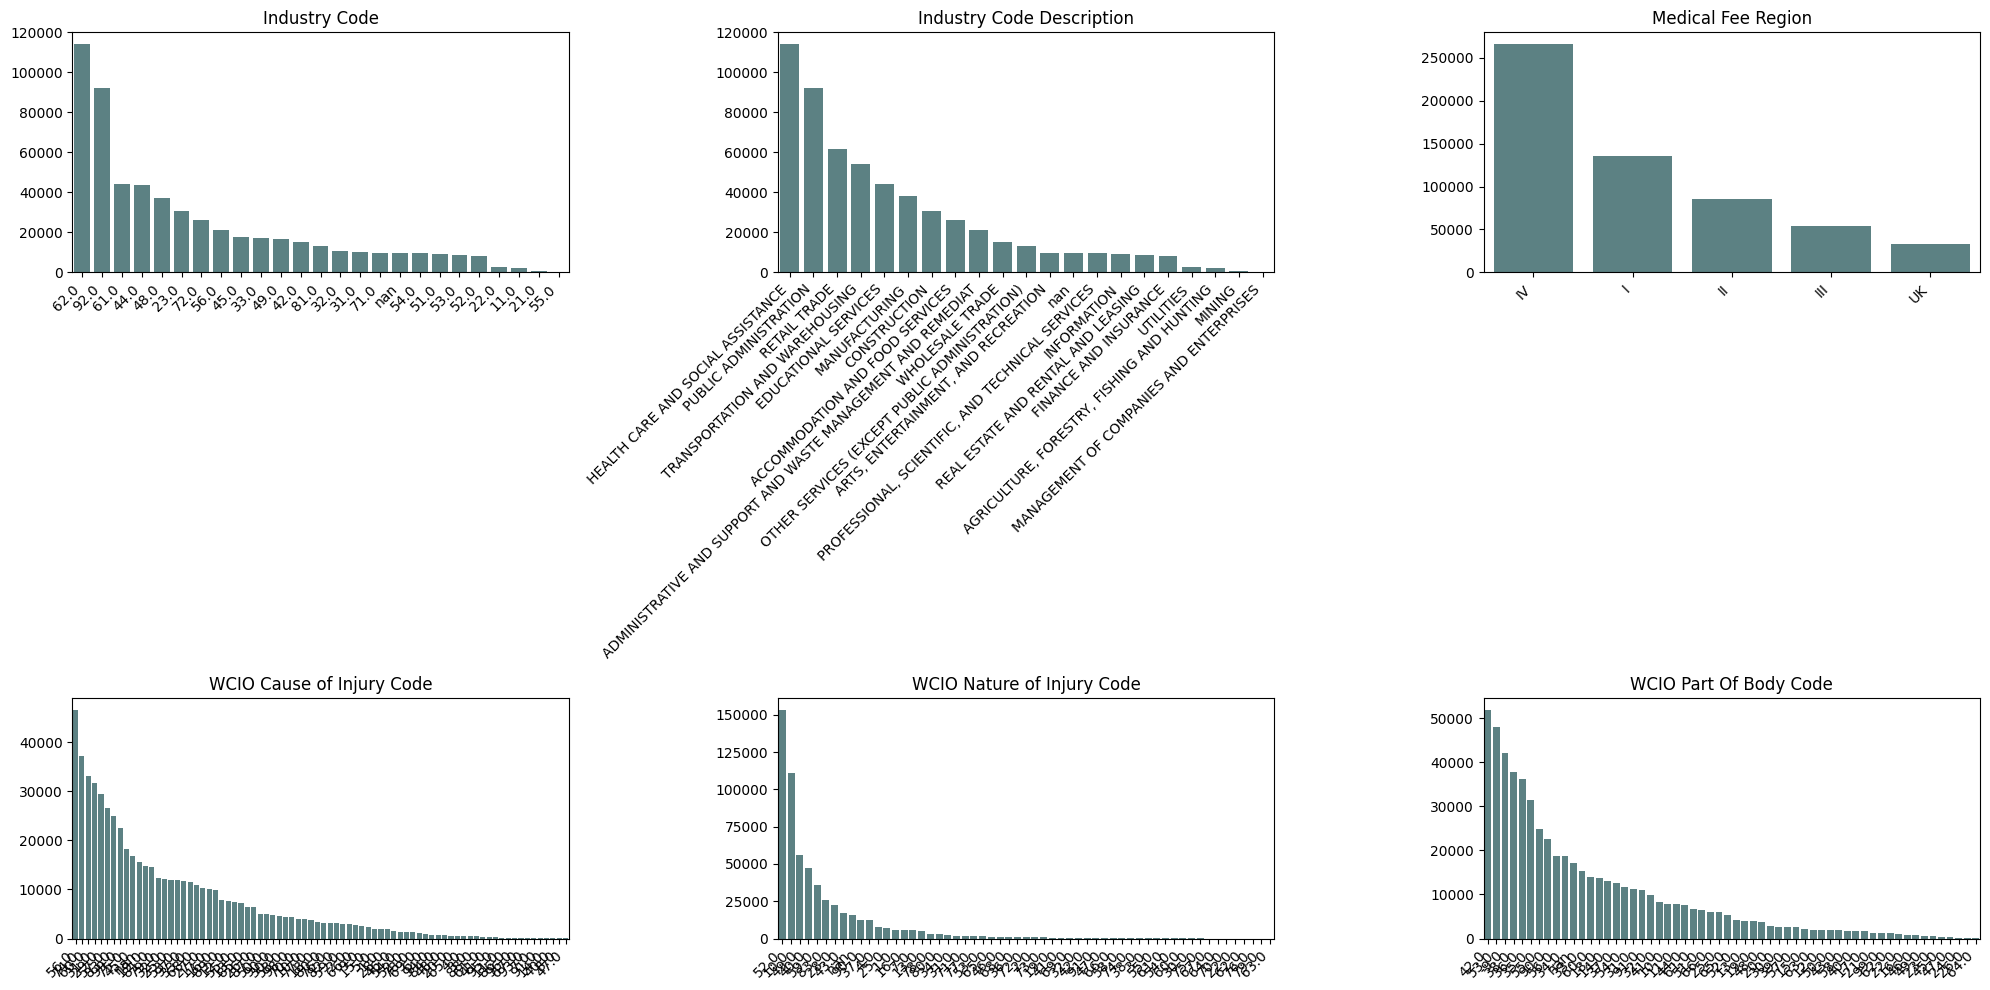

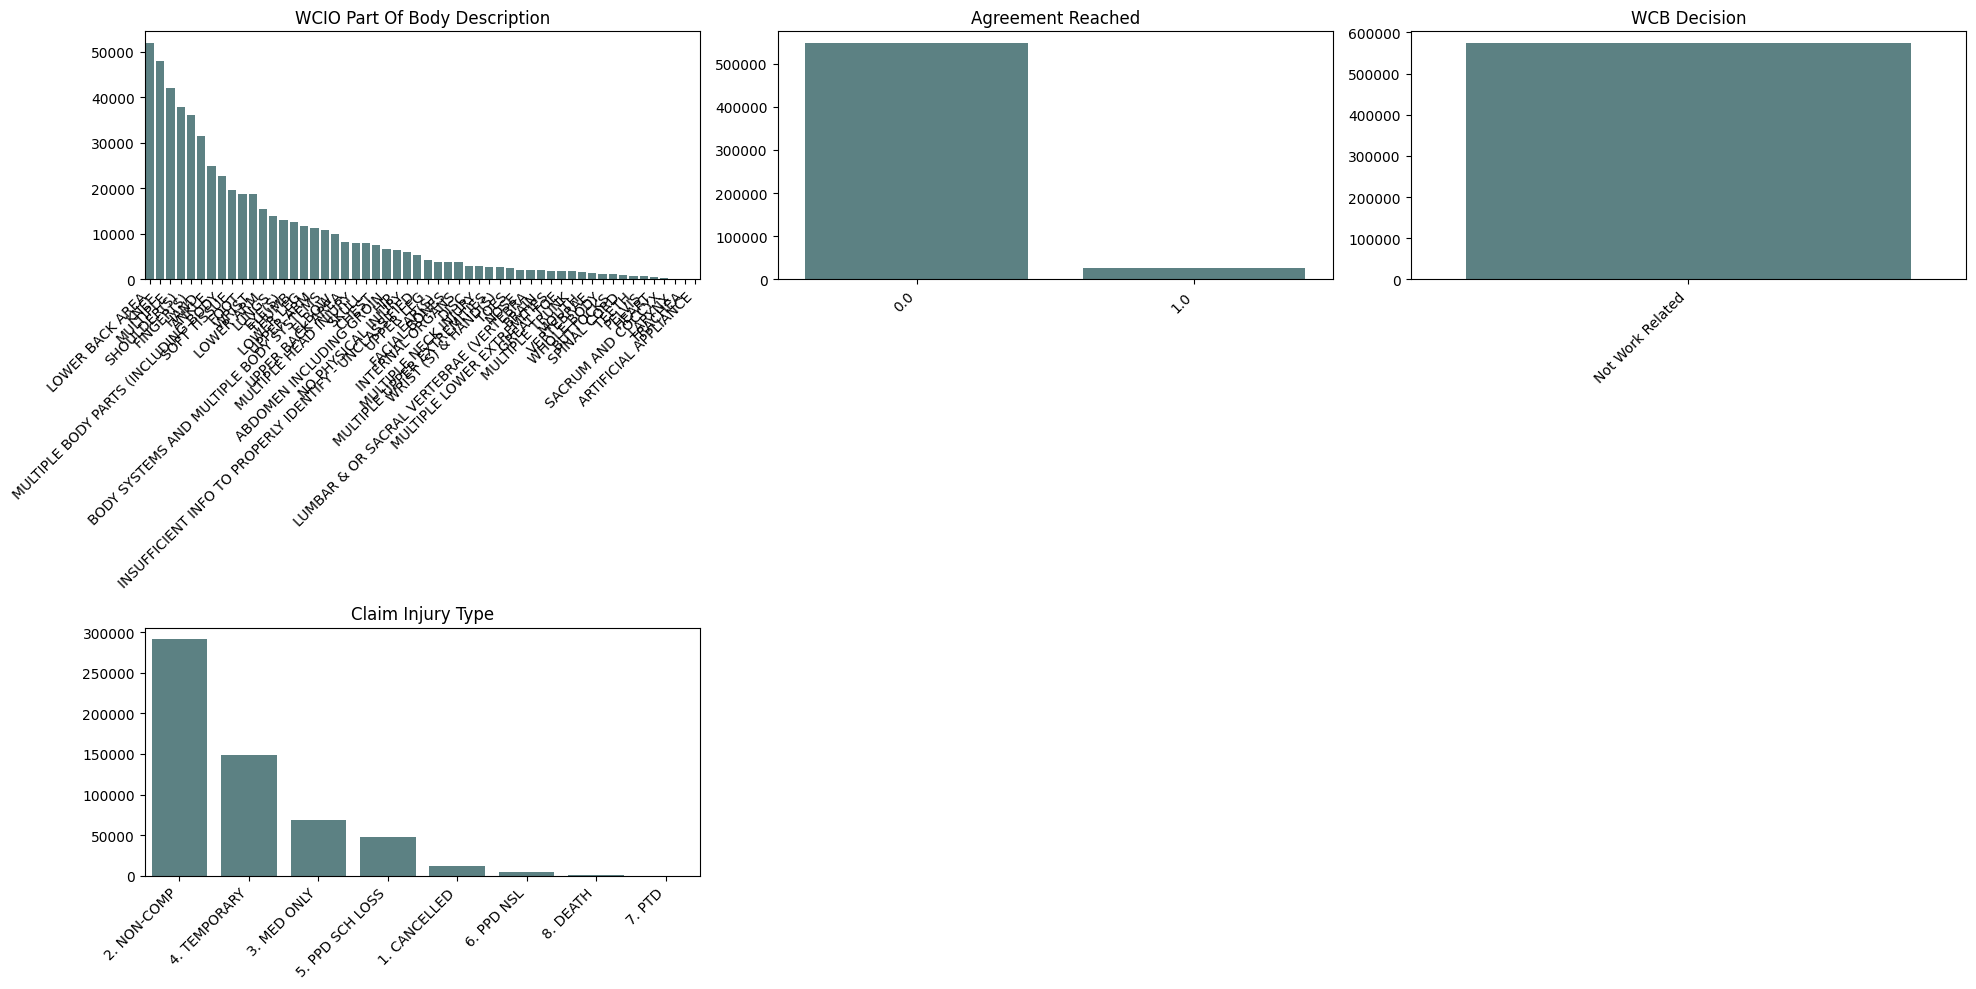

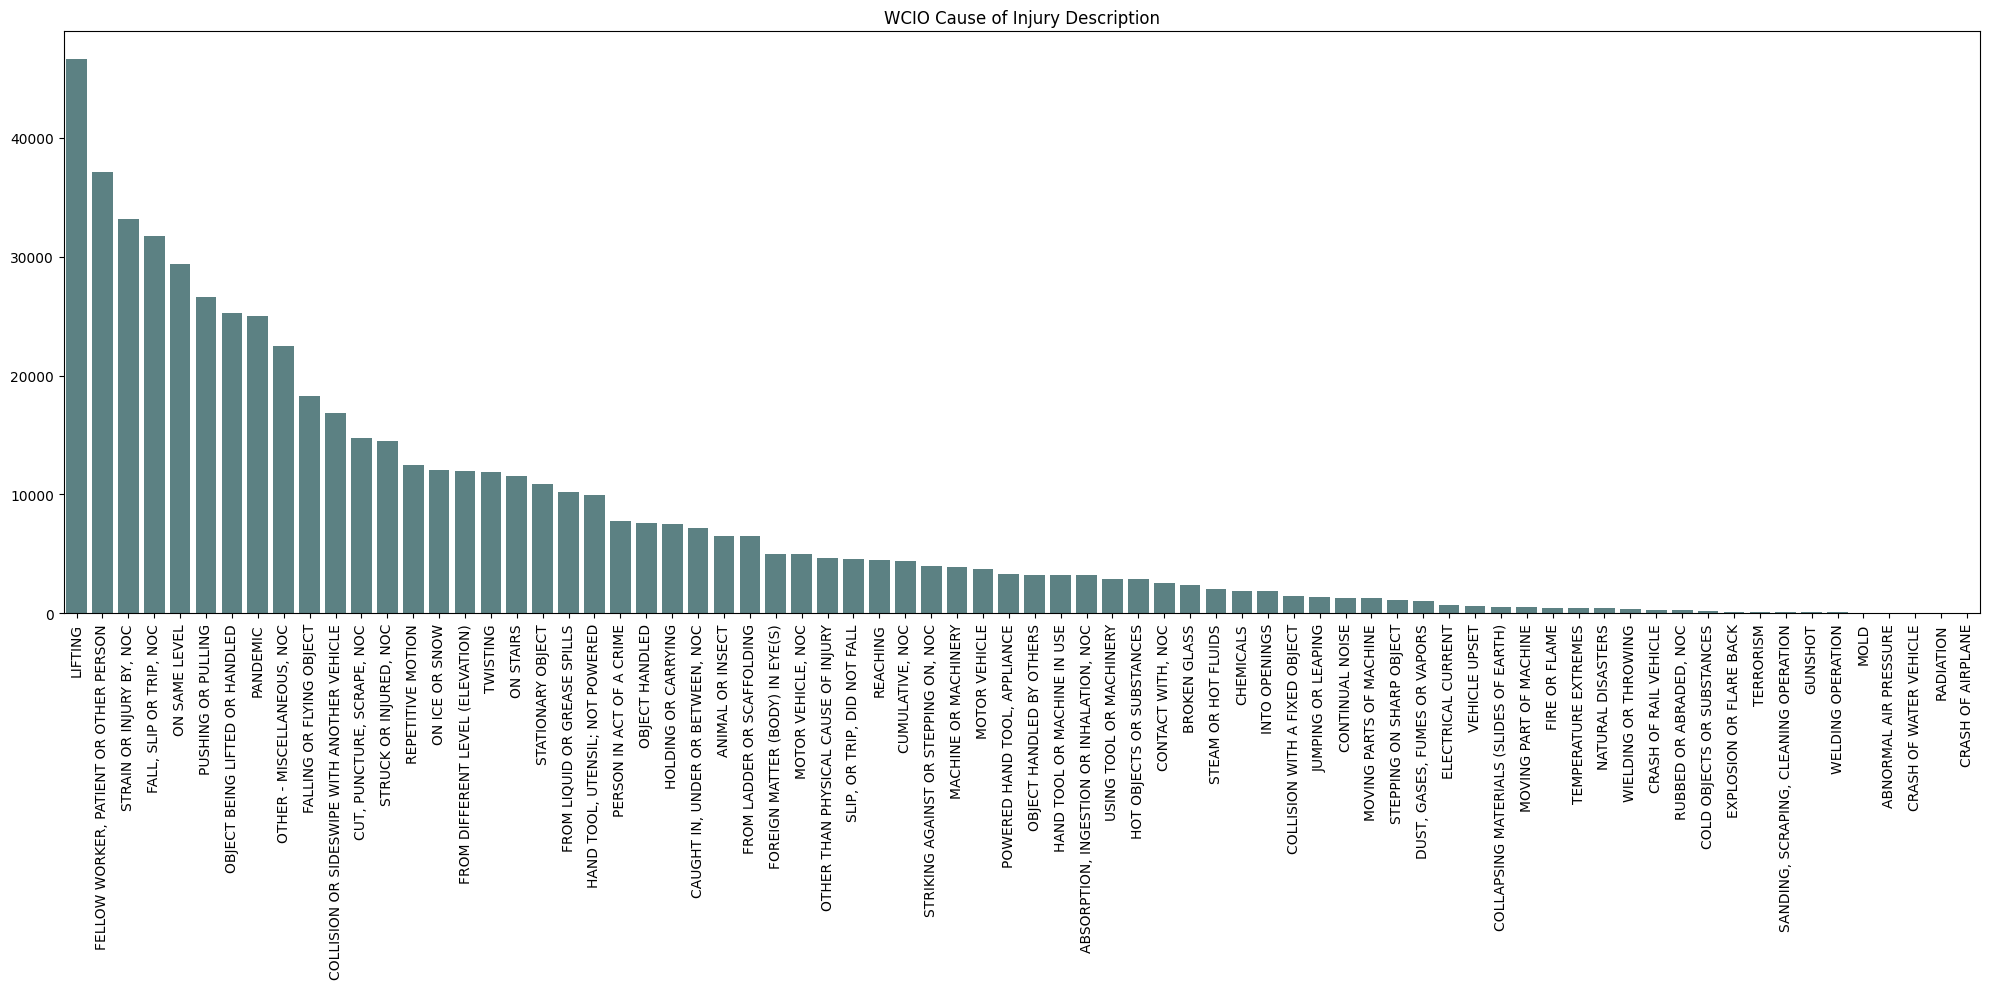

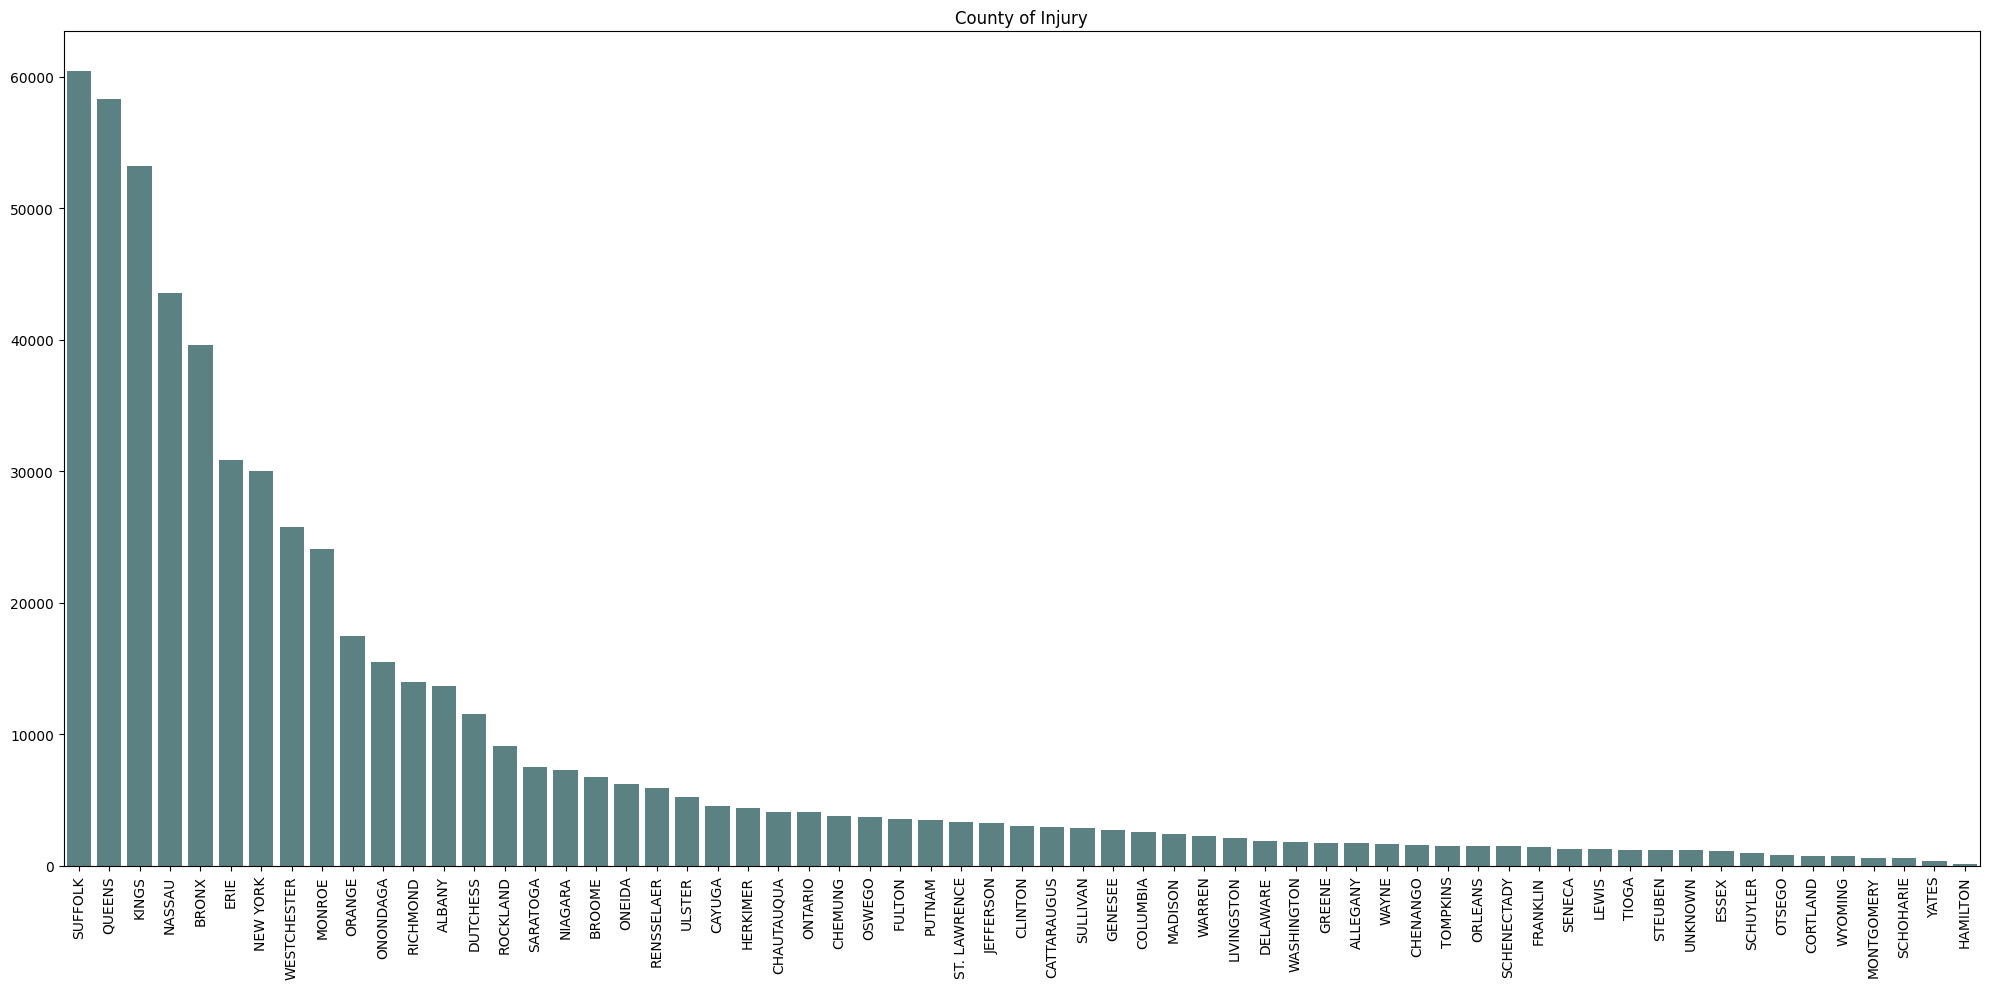

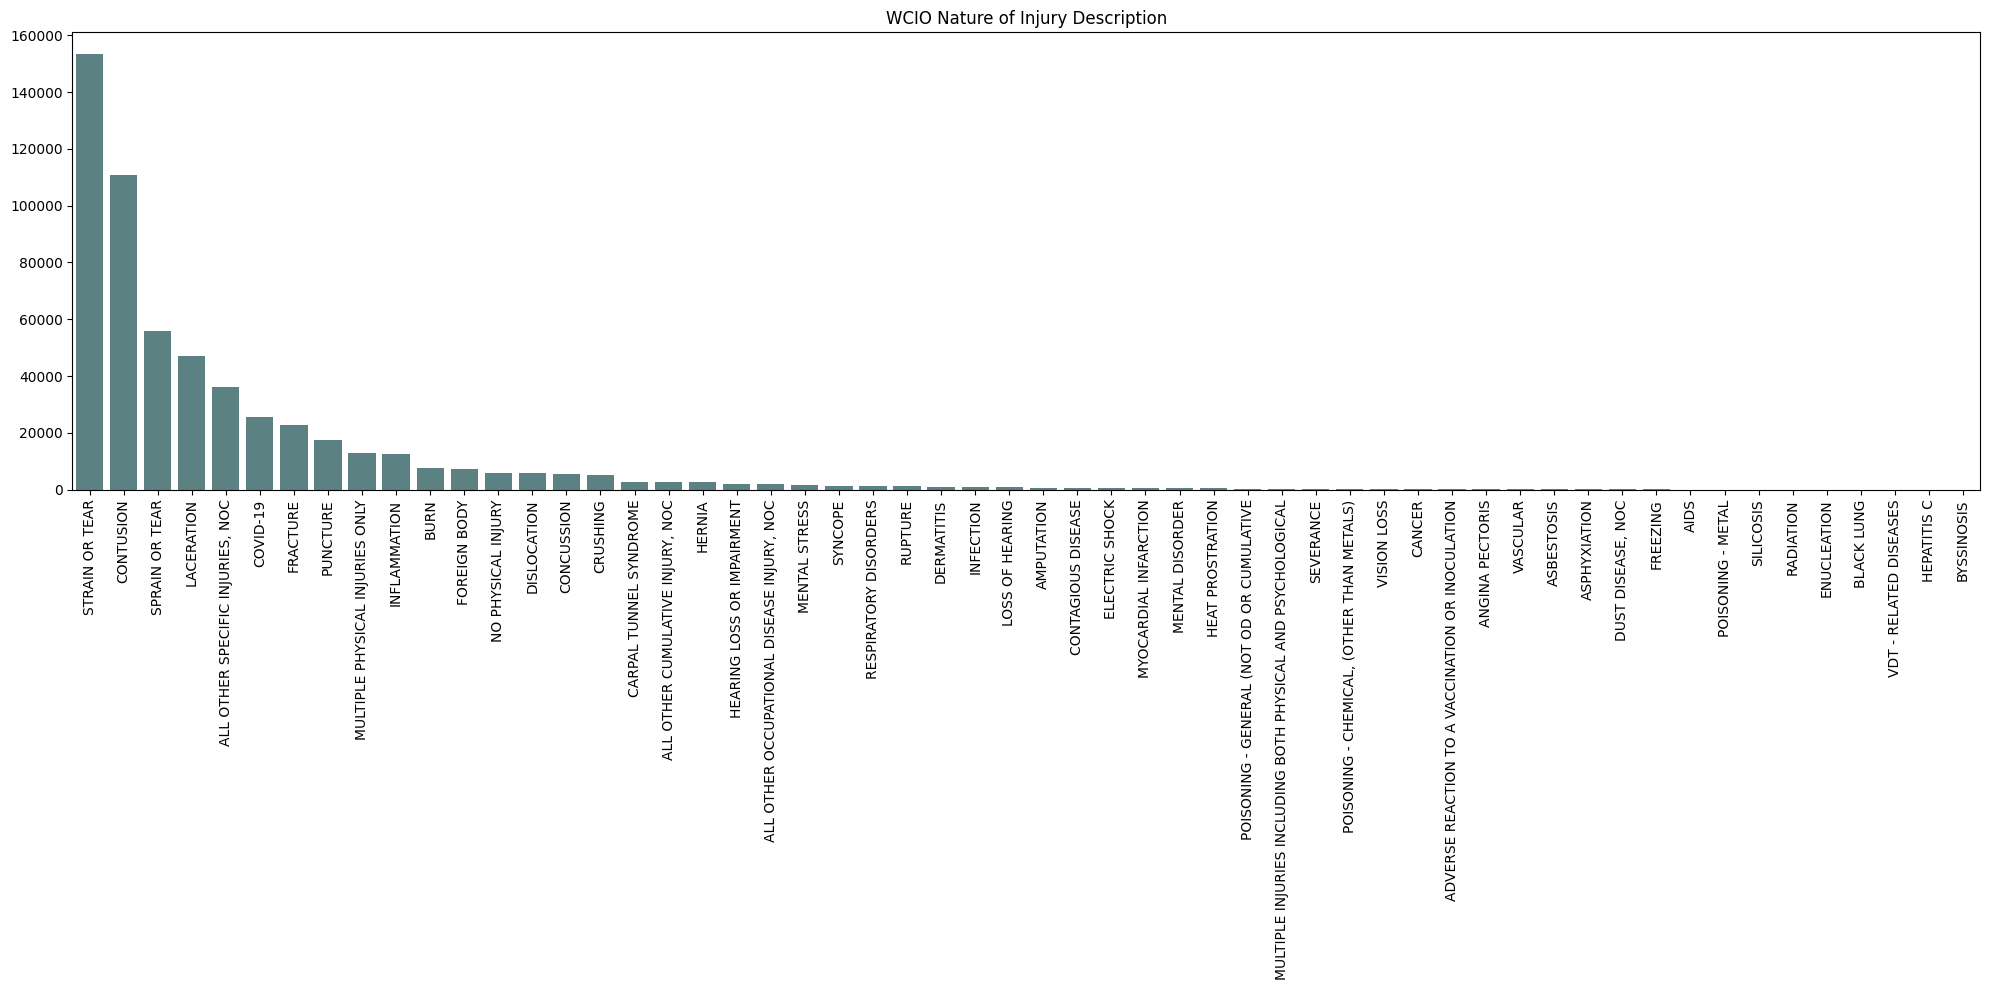

In [39]:
def plot_categorical_features(categorical_df, max_features_per_plot=6, figsize=(20, 15), 
                              exclude_features=['Carrier Name', 'WCIO Cause of Injury Description', 'County of Injury', 'WCIO Nature of Injury Description', 'Zip Code']):
    filtered_features = [feat for feat in categorical_df.columns if feat not in exclude_features]
    num_features = len(filtered_features)
    num_plots = (num_features + max_features_per_plot - 1) // max_features_per_plot

    for plot_idx in range(num_plots):
        start_idx = plot_idx * max_features_per_plot
        end_idx = min((plot_idx + 1) * max_features_per_plot, num_features)
        current_features = filtered_features[start_idx:end_idx]
        
        fig, axes = plt.subplots(
            nrows=(len(current_features) + 2) // 3, 
            ncols=3, 
            figsize=(20, 5 * ((len(current_features) + 2) // 3))
        )
        
        axes = axes.flatten()
        
        for i, feature in enumerate(current_features):
            value_counts = categorical_df[feature].value_counts()
        
            sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[i], color=plot_color)
            axes[i].set_title(feature)

            # Set the ticks first, then set the tick labels
            axes[i].set_xticks(range(len(value_counts.index)))
            axes[i].set_xticklabels(value_counts.index, rotation=45, ha='right')
            axes[i].set_xlabel(None)
        
        for j in range(i+1, len(axes)):
            axes[j].axis('off')
        
        plt.tight_layout()
        plt.show()

    # Plot the excluded features separately
    excluded_features = ['WCIO Cause of Injury Description', 'County of Injury','WCIO Nature of Injury Description']
    for feature in excluded_features:
        plt.figure(figsize=(20, 10))
        value_counts = categorical_df[feature].value_counts()
        
        plt.subplot(1, 1, 1)
        sns.barplot(x=value_counts.index, y=value_counts.values, color=plot_color)
        plt.title(feature)
        plt.xticks(rotation=90)
        plt.xlabel(None)
        plt.tight_layout()
        plt.show()

plot_categorical_features(categorical_df)


# <span style="color:yellow">Funções do outro notebook, Precisa de markdowns</span>

# <span style="color:yellow">Sofia</span>

<a class="anchor" id="nine-bullet"> 

## <span style="color:#568789"> 9. Variable Encoding</span> 

<a href="#top">Top &#129033;</a>

To use the categorical variables, it is necessary to encode them as most models do not accept non-numerical values. We used six different encoders:

1. **One-Hot Encoder**  
   Converts categories into binary columns (1/0). Best for low-cardinality features.

2. **Frequency Encoder**  
   Replaces categories with their occurrence counts. Good for high-cardinality features.

3. **Hash Encoder**  
   Maps categories into a fixed number of hash buckets. Useful for very high-cardinality features.

4. **Ordinal Encoder**  
   Assigns integer values to categories based on their ordered relationship. Best for ordinal features.

5. **Sine Cosine Encoder**  
   Represents cyclical features using sine and cosine transformations. For cyclical data like time or angles.

6. **Label Encoder**  
   Assigns a unique integer to each category. Suitable for ordinal features.


---
#### **Variable Encoding Table**

| **Variable Name**                     | **Encoding Method Used** |
|---------------------------------------|--------------------------|
| Accident Season                       | Sine Cosine Encoder      |
| Alternative Dispute Resolution        | One-Hot Encoder          |
| Attorney/Representative               | One-Hot Encoder          |
| Carrier Type                          | Ordinal Encoder          |
| COVID-19 Indicator                    | One-Hot Encoder          |
| County of Injury                      | Frequency Encoder        |
| District Name                         | Frequency Encoder        |
| Gender                                | One-Hot Encoder          |
| Medical Fee Region                    | One-Hot Encoder          |
| Zip Code                              | Frequency Encoder        |
| Claim Injury Type                     | Label Encoder            |
| Industry Code                         | Frequency Encoder        |
| WCIO Cause of Injury Code             | Frequency Encoder        |
| WCIO Nature of Injury Code            | Frequency Encoder        |
| WCIO Part of Body Code                | Frequency Encoder        |


However, not all encoders can be applied immediately. We can only apply the Frequency Encoder after splitting the data to avoid data leakage. Additionally, the Hash Encoder will only be applied after the Frequency Encoder if a feature has two or more values with the same frequency. For the other encoders this precaution is not necessary because they use the unique values of each row not their frequency.

*One-Hot Encoder*

This encoder is manly applied to categorical features that are not ordinal and that do not have many unique values.

In [41]:
# Features for One Hot Encoding
one_hot_encoder_vars = [
    "Alternative Dispute Resolution",
    "Attorney/Representative",
    "Carrier Type",
    "COVID-19 Indicator",
    "Gender",
    "Medical Fee Region"
]


# Apply the function to the DataFrame
train_df = apply_one_hot_encoding(train_df, one_hot_encoder_vars)
test_df = apply_one_hot_encoding(test_df, one_hot_encoder_vars)

train_df

,Accident Date,Age at Injury,Assembly Date,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Claim Injury Type,County of Injury,...,Carrier Type_4A. SELF PRIVATE,Carrier Type_5D. SPECIAL FUND - UNKNOWN,Carrier Type_UNKNOWN,COVID-19 Indicator_Y,Gender_M,Gender_Unknown,Medical Fee Region_II,Medical Fee Region_III,Medical Fee Region_IV,Medical Fee Region_UK
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5393875,2019-12-30,31,2020-01-01,NaN,1988,2019-12-31,NaT,NEW HAMPSHIRE INSURANCE CO,2. NON-COMP,ST. LAWRENCE,...,0,0,0,0,1,0,0,0,0,0
5393091,2019-08-30,46,2020-01-01,1745.93,1973,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,4. TEMPORARY,WYOMING,...,0,0,0,0,0,0,0,0,0,0
5393889,2019-12-06,40,2020-01-01,1434.80,1979,2020-01-01,NaT,INDEMNITY INSURANCE CO OF,4. TEMPORARY,ORANGE,...,0,0,0,0,1,0,1,0,0,0
5393887,2019-12-30,61,2020-01-01,NaN,1958,2019-12-31,NaT,STATE INSURANCE FUND,2. NON-COMP,DUTCHESS,...,0,0,0,0,1,0,1,0,0,0
5393863,2019-12-26,67,2020-01-01,NaN,1952,2019-12-31,NaT,INDEMNITY INS. OF N AMERICA,3. MED ONLY,SUFFOLK,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6165265,2022-12-14,35,2022-12-30,NaN,1987,2022-12-30,NaT,STATE INSURANCE FUND,2. NON-COMP,BRONX,...,0,0,0,0,1,0,0,0,1,0
6165285,2022-12-15,33,2022-12-31,NaN,1989,2022-12-31,NaT,WESCO INSURANCE CO,2. NON-COMP,NASSAU,...,0,0,0,0,1,0,0,0,1,0
6165506,2022-12-13,61,2022-12-31,991.08,1961,2022-12-31,NaT,SECURITY NATIONAL INSURANCE CO,4. TEMPORARY,ERIE,...,0,0,0,0,0,0,1,0,0,0


*Frequency Encoder*

This encoder will only be applied after we split our data.

In [42]:
# Variables for Frequency Encoder
frequency_encoder_vars = [
    "County of Injury",
    "District Name",
    "Zip Code",
    "Industry Code",
    "WCIO Cause of Injury Code",
    "WCIO Nature of Injury Code",
    "WCIO Part of Body Code"
]

*Hash Encoder*

We decided to use this encoder to deal with one of the downsides of the frequency encoder. WHen two values appear the same number of times, they will have the same value after encoding them with Frequency Encoder. To avoid such cases, we decided to apply Hash Encoding when a features have values with the same frequency. As such, it can only be applied after we split our data.

*Sine Cosine Encoder*

The feature `Accident_Season` is a cyclic feature. As such, we decided to use this specific encoder.

In [44]:
season_mapping = {"Winter": 0, "Spring": 1, "Summer": 2, "Fall": 3}

In [45]:
train_df = sine_cosine_encoding(train_df, "Accident_Season", season_mapping )
test_df = sine_cosine_encoding(test_df, "Accident_Season", season_mapping)

*Label Encoder*

This encoder will be applied in our target which only exists in the training dataset.

In [46]:
# Create a sorted list of unique categories in the 'Claim Injury Type' column of training_df
categories = sorted(cat for cat in train_df['Claim Injury Type'].unique())

# Initialize a LabelEncoder
label_encoder = LabelEncoder()

# Fit the LabelEncoder to the training data
label_encoder.fit(categories)

# Encode the 'Claim Injury Type' column in training_df
train_df['Claim Injury Type Encoded'] = label_encoder.transform(train_df['Claim Injury Type'])

<a class="anchor" id="ten-bullet"> 

## <span style="color:#568789"> 10. Export Datasets</span> 

<a href="#top">Top &#129033;</a>

Before exporting the datasets, we are going to remove the columns that we deemed unnecessary to train the models like features with descriptions and checking that we removed the features that we encoded. Additionally, we also remove the columns that do not appear in the test dataset from the training dataset.

In [47]:
code_descriptions = ["Industry Code Description",
                      "WCIO Cause of Injury Description",
                      "WCIO Nature of Injury Description",
                      "WCIO Part Of Body Description"]

In [48]:
train_df.drop(code_descriptions, axis=1, inplace=True)
test_df.drop(code_descriptions, axis=1, inplace=True)
train_df.drop(["Agreement Reached","WCB Decision"], axis=1, inplace = True) # Not in Test

In [49]:
to_drop = ["Attorney/Representative", "Carrier Type", "COVID-19 Indicator", "Gender", "Medical Fee Region",
           "Claim Injury Type", "Carrier Name",
           "First Hearing Date", "C-2 Date", "C-3 Date", "Assembly Date"
]

In [50]:
for col in to_drop:
    try:
        train_df.drop(col, axis=1, inplace=True)
    except KeyError:
        print(f"{col} not found in Train_df")
    try:
        test_df.drop(col, axis=1, inplace=True)
    except KeyError:
        print(f"{col} not found in Test_df")

Attorney/Representative not found in Train_df
Attorney/Representative not found in Test_df
Carrier Type not found in Train_df
Carrier Type not found in Test_df
COVID-19 Indicator not found in Train_df
COVID-19 Indicator not found in Test_df
Gender not found in Train_df
Gender not found in Test_df
Medical Fee Region not found in Train_df
Medical Fee Region not found in Test_df
Claim Injury Type not found in Test_df


Here, we finally export our data.

In [51]:
folder_path = "./preprocessed_data/"

if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    print(f"Folder '{folder_path}' created.")
else:
    print(f"Folder '{folder_path}' already exists.")

Folder './preprocessed_data/' already exists.


In [52]:
train_df.to_csv('./preprocessed_data/train_data.csv', index = True)
test_df.to_csv('./preprocessed_data/test_data.csv', index = True)

# Rui
- Encode ultimo dos WCIO codes
- Encode Carrier Name: Ainda N/ not needed

--------------------------

- Remover o split train e test: Done
- Drop NAs na Accident date e Birth Year: N sei o q fazer ja q test tem NAs
- Calcular Age/Birth Year com age at accident e accident date: Done
- Juntar X e U em gender (numeros baixos): Done
- Drop Codes Descriptions: Done
- Juntar os 3 injury codes num so: Done
- Fazer um risk map (dict) para converter o industry code, NAs -> Unkown e 1 (normal risk): Done
- Combinar Carrier Type (5-Unknows): Done
- Drop Alternative Dispute Resolution (99,5% N): Done
- Drop/NA idades que sáo abaixo de 14 (minimum work age US): Não podemos, test_df.min() = 5
- Fazer Dummies (0 e 1) para C-2, C-3 e First Hearing (if it happen or not): Done
- Fazer Age groups: Needs Change
- Drop as cols q n estão no test: Done


Extra:
-  o test dataset tem acima de 75% NAs em First Hearing, Average Weekly Wage e C-3 Date, nas data significa q ainda n aconteceu mas para Average Weekly Wage vamos ter de usar KNN inputer para ter um valor mais correto (Median bad)
-  Como first hearing no test tem muitos NAs talvez devamos drop a feature pq a informação é muito diferente do train
 